# Hw2 -Type 1 Diabetes

First we will load the packages to the notebook:

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
%load_ext autoreload

1) Load the data. Explain any preprocessing. (5%)

Next we will load the data and print it:

In [2]:
file = Path.cwd().joinpath('HW2_data.csv') # concatenates HW2_data.csv to the current folder 
T1D_dataset = pd.read_csv(file)  # load the data 
T1D_dataset.head()

,Age,Gender,Increased Urination,Increased Thirst,Sudden Weight Loss,Weakness,Increased Hunger,Genital Thrush,Visual Blurring,Itching,Irritability,Delayed Healing,Partial Paresis,Muscle Stiffness,Hair Loss,Obesity,Diagnosis,Family History
0,45,Male,No,No,No,Yes,No,No,No,Yes,No,No,Yes,No,Yes,No,Negative,0
1,42,Male,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,Negative,0
2,45,Male,Yes,Yes,No,Yes,No,Yes,No,No,No,Yes,No,No,Yes,No,Positive,0
3,59,Female,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Positive,1
4,40,Female,Yes,Yes,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Positive,0


In [3]:
T1D_features = T1D_dataset[['Age', 'Gender', 'Increased Urination', 'Increased Thirst', 'Sudden Weight Loss', 'Weakness', 'Increased Hunger', 'Genital Thrush', 'Visual Blurring', 'Itching', 'Irritability', 'Delayed Healing', 'Partial Paresis', 'Muscle Stiffness', 'Hair Loss', 'Obesity', 'Family History']]
T1D_class = T1D_dataset[['Diagnosis']]
# replace No / Negative and Yes / Positive with 0 and 1 respectively; 
# replace the missing values with random sampling from the column distribution
from clean_data import blank_2_num_samp
T1D_features_clean = blank_2_num_samp(T1D_features)
T1D_class_clean = blank_2_num_samp(T1D_class)

random.seed(10)  

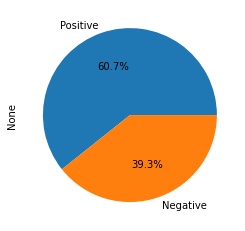

In [4]:
T1D_class_clean.value_counts().plot(kind="pie", labels=['Positive','Negative'], autopct='%1.1f%%') 
plt.show()

In the plot above, we can see that from all the participants 60.7% have been diagnosed with T1D.

2) Perform a test-train split of 20% test. (5%)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(T1D_features_clean, np.ravel(T1D_class_clean), test_size=0.2, random_state=0, stratify=np.ravel(T1D_class_clean))

3) Provide a detailed visualization and exploration of the data. (10%) <br>
You should at least include:<br>
a. An analysis to show that the distribution of the features is similar between test and
train.<br>
i. What issues could an imbalance of features between train and test cause?<br>
Imbalance of features between train and test set can increase the bias.<br>
ii. How could you solve the issue? <br>
It is possible to use stratification in the split. Another option is to synthetically add data with similar distribution to the data set (augmentation). It is also possible to use k -fold cross validation. For example, you could divide your data into 10 folds. Then, for each fold individually, use that fold as the test set and the remaining 9 folds as a train set. You can then average training accuracy over the 10 runs. The point of this method is that since only 1/10 of your data is in the test set, it is unlikely that all your minority class samples end up in the test set.

In [6]:
print('Table showing distribution of positive binary features between train and test sets')
feat_stat = pd.DataFrame()
feat_stat['Positive feature'] = X_train.keys()[3:]
#print(feat_stat)
feat_stat_train = []
feat_stat_test = []
feat_stat_delt = []
for key in X_train.keys()[3:]:
    feat = [key]
    positive_feat_train = X_train[feat].iloc[:].values
    feat_stat_train.append(int(100*len(positive_feat_train[positive_feat_train==1])/len(positive_feat_train)))
    positive_feat_test = X_test[feat].iloc[:].values
    feat_stat_test.append(int(100*len(positive_feat_test[positive_feat_test==1])/len(positive_feat_test)))
    feat_stat_delt.append(abs(int(100*len(positive_feat_test[positive_feat_test==1])/len(positive_feat_test) - 100*len(positive_feat_train[positive_feat_train==1])/len(positive_feat_train))))
feat_stat['Train %'] = feat_stat_train
feat_stat['Test %'] = feat_stat_test
feat_stat['Delta %'] = feat_stat_delt
print(feat_stat)

Table showing distribution of positive binary features between train and test sets
      Positive feature  Train %  Test %  Delta %
0     Increased Thirst       44      39        5
1   Sudden Weight Loss       40      45        5
2             Weakness       56      60        3
3     Increased Hunger       45      42        2
4       Genital Thrush       21      27        6
5      Visual Blurring       45      41        4
6              Itching       48      46        2
7         Irritability       23      25        2
8      Delayed Healing       46      43        3
9      Partial Paresis       42      42        0
10    Muscle Stiffness       36      38        2
11           Hair Loss       34      41        7
12             Obesity       17      14        3
13      Family History       50      52        1


We can see that the delta is very small, meaning the test set and tarining set are very similar. 

Next we will print the age distribution of the two sets, because it is not binary and is shown as a histogram.

Table showing distribution of Age between train and test set


D:\ML\App\envs\bm-336546-hw2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\ML\App\envs\bm-336546-hw2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


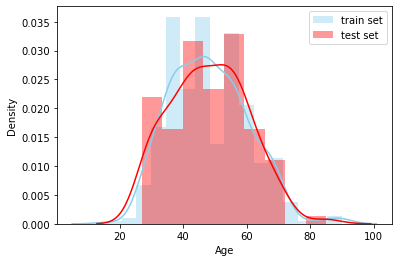

In [7]:
print('Table showing distribution of Age between train and test set')
positive_feat_train = X_train['Age']
positive_feat_test = X_test['Age']

sns.distplot(positive_feat_train , color="skyblue", label="train set")
sns.distplot(positive_feat_test , color="red", label="test set")
plt.legend()
plt.show()

We can see that the distribution is very similar for the train and test set. They both have a similar density and both peak at around 50 years of age. 

Table showing distribution of Gender between train and test set


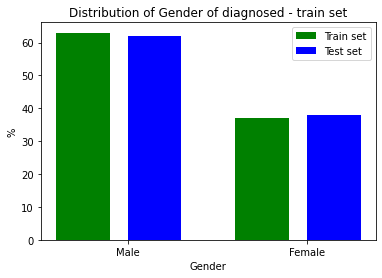

The Train set Gender % is:  [63, 37]
The Test set Gender % is:  [62, 38]


In [8]:
print('Table showing distribution of Gender between train and test set')
gender_stat_train=[]
gender_stat_test=[]
positive_feat_train = X_train['Gender'].iloc[:].values
gender_stat_train.append(int(100*len(positive_feat_train[positive_feat_train==2])/len(positive_feat_train))) #male
gender_stat_train.append(100-gender_stat_train[0])
positive_feat_test = X_test['Gender'].iloc[:].values
gender_stat_test.append(int(100*len(positive_feat_test[positive_feat_test==2])/len(positive_feat_test))) #male
gender_stat_test.append(100-gender_stat_test[0])

#create bar plot
bars = ('Male', 'Female')

y_pos = np.arange(len(bars))
y_pos2 = [x + 0.4 for x in y_pos]
plt.bar(y_pos , gender_stat_train, color = ['g'], label = 'Train set', width = 0.3)
plt.bar(y_pos2 , gender_stat_test, color = ['b'], label = 'Test set', width = 0.3)
plt.title('Distribution of Gender of diagnosed - train set')
plt.xlabel('Gender')
plt.ylabel('%')
plt.xticks([y_pos + 0.25 for y_pos in range(len(bars))], bars)

plt.legend()
plt.show()

print('The Train set Gender % is: ',gender_stat_train)
print('The Test set Gender % is: ',gender_stat_test)

We can see that the amount of males and females in the test and train set is similar but not identical.

b. Plots to show the relationship between feature and label. See Figure 1 below.

Plots showing the relationship between features and label


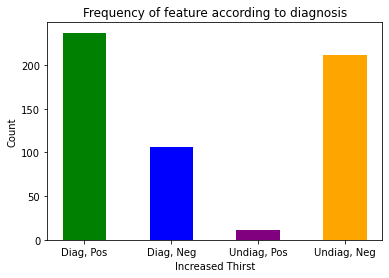

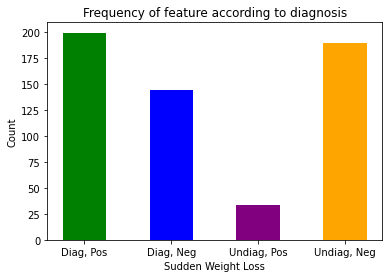

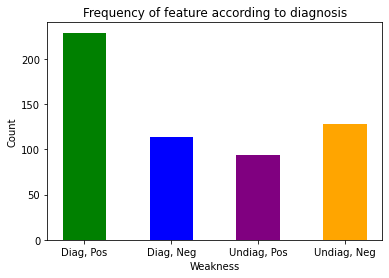

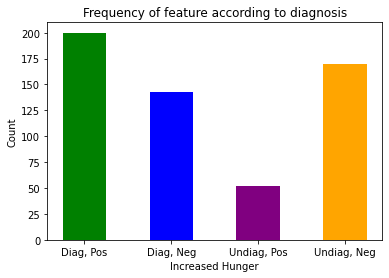

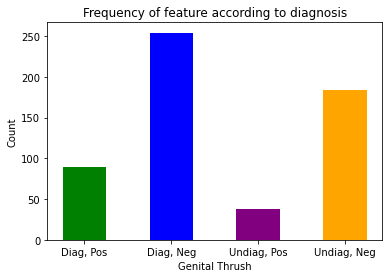

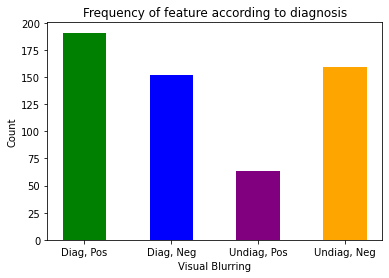

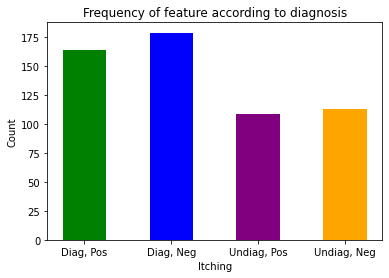

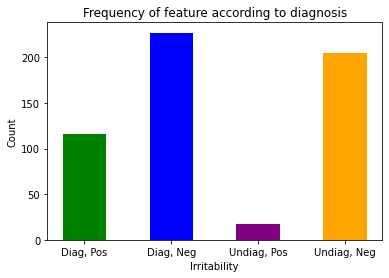

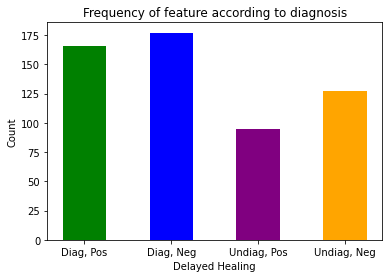

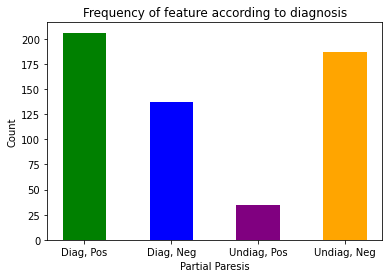

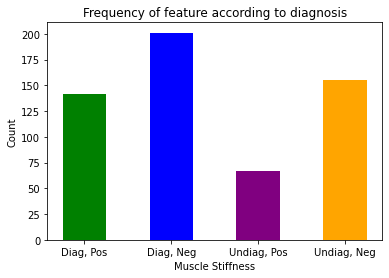

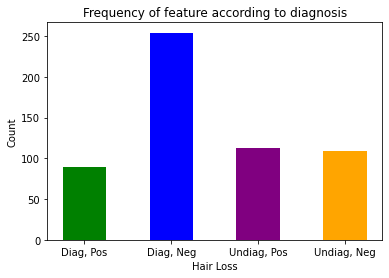

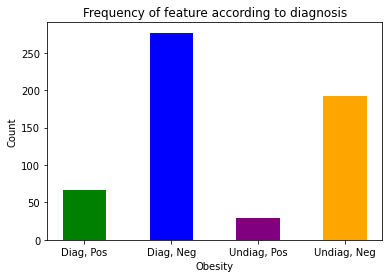

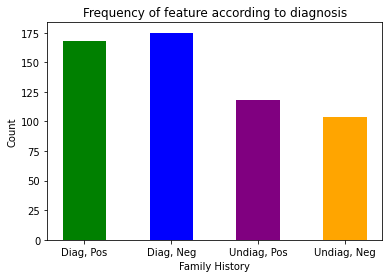

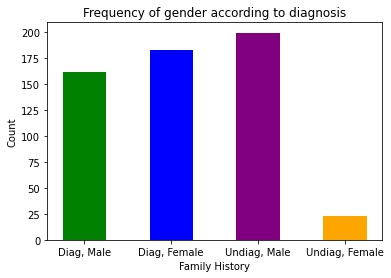

In [9]:
print('Plots showing the relationship between features and label')
for key in X_train.keys()[3:]:
    feat_stat = []
    feat = [key]
    #print(T1D_features_clean[feat])
    #print(np.ravel(T1D_class_clean)==0)
    #print([T1D_features_clean[feat].iloc[np.ravel(T1D_class_clean)==0].values==0])
    feat__no = T1D_features_clean[feat].iloc[np.ravel(T1D_class_clean)==0].values #undiagnosed
    feat_yes = T1D_features_clean[feat].iloc[np.ravel(T1D_class_clean)==1].values #diagnosed
    feat_stat.append(len(feat_yes[feat_yes==1]))
    feat_stat.append(len(feat_yes[feat_yes==0]))
    feat_stat.append(len(feat__no[feat__no==1]))
    feat_stat.append(len(feat__no[feat__no==0]))

  #  print(feat_stat)
    bars = ('Diag, Pos', 'Diag, Neg', 'Undiag, Pos', 'Undiag, Neg')

    y_pos = np.arange(len(bars))
    plt.bar(y_pos , feat_stat, color = ['g', 'b', 'purple', 'orange'],  width = 0.5)
    plt.title('Frequency of feature according to diagnosis')
    plt.xlabel(str(key))
    plt.ylabel('Count')
    plt.xticks(y_pos , bars)

    #plt.legend()
    plt.show()
feat_stat = []
feat = ['Gender']
#print(T1D_features_clean[feat])
#print(np.ravel(T1D_class_clean)==0)
#print([T1D_features_clean[feat].iloc[np.ravel(T1D_class_clean)==0].values==0])
feat__no = T1D_features_clean[feat].iloc[np.ravel(T1D_class_clean)==0].values #undiagnosed
feat_yes = T1D_features_clean[feat].iloc[np.ravel(T1D_class_clean)==1].values #diagnosed
feat_stat.append(len(feat_yes[feat_yes==2])) #male
feat_stat.append(len(feat_yes[feat_yes==3]))
feat_stat.append(len(feat__no[feat__no==2])) #male
feat_stat.append(len(feat__no[feat__no==3]))

#  print(feat_stat)
bars = ('Diag, Male', 'Diag, Female', 'Undiag, Male', 'Undiag, Female')

y_pos = np.arange(len(bars))
plt.bar(y_pos , feat_stat, color = ['g', 'b', 'purple', 'orange'],  width = 0.5)
plt.title('Frequency of gender according to diagnosis')
plt.xlabel(str(key))
plt.ylabel('Count')
plt.xticks(y_pos , bars)

#plt.legend()
plt.show()
        

For example, in increased thirst we can see that there is a correlation between people who have an increase in thirst to the likelyhood of being diagnosed with T1D. 

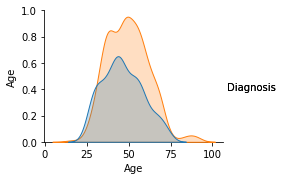

In [10]:
a = sns.pairplot(T1D_dataset.loc[:,('Diagnosis', 'Age')], hue="Diagnosis");
a.add_legend()

Age is not a categorial or binary data so we plotted it seperately. We can see from the age plot that people diagnosed are generaly older. However, the distributions overlap. 

c. Additional plots that make sense given the mostly binary nature of this dataset. <br>

Plotting all the data takes a lot of time, so to demonstrate a second plot we will choose a few columns. 
An alternative plot for categorial data is a scatter plot. 

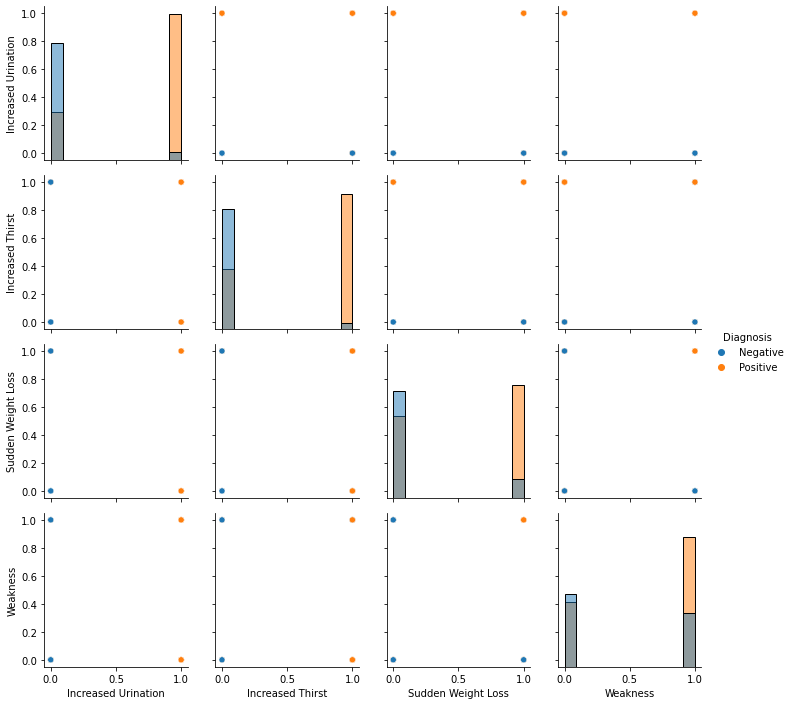

In [11]:
dataset = T1D_features_clean.copy()
idx = 0
new_col = T1D_dataset['Diagnosis']  # can be a list, a Series, an array or a scalar   
dataset.insert(loc=idx, column='Diagnosis', value=new_col)
#Plotting all the data takes a lot of time, so to demonstrate a second plot we will choose a few columns. 
#An alternative lot for categorial data is a scatter plot. 
#print(dataset.keys)

variables = dataset[['Increased Urination', 'Increased Thirst', 'Sudden Weight Loss', 'Weakness']]
#print(variables)
g = sns.PairGrid(dataset, hue="Diagnosis", vars = variables)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()
#size = dataset["Gender"]

d. State any insights you have<br>
i. Was there anything unexpected?<br>
ii. Are there any features that you feel will be particularly important to your<br>
model? Explain why.

As we can see from the pairplot increased thirst and increast urination strongly indicate T1D. Although an increase in each seperately can but not necessarily indicate positive for T1D. Other interesting parameters are sudden weight loss and weakness. seperately they both don't indicate T1D, but if a patient has the two symptoms together it indicates he is likely to be diagnosed with T1D. <br>
If we look at the previous plots we can see that obesity didn't lead to T1D. This is unexpected because we would think that obese patients would be more incline to have T1D. <br>

4) Encode all your data as one hot vectors. (5%)

In [12]:
T1_feat_no_age = T1D_features_clean.copy()
T1_feat_no_age = T1_feat_no_age.drop('Age', axis = 1)
onehot_encoder = OneHotEncoder(sparse=False)
X = onehot_encoder.fit_transform(T1_feat_no_age)
X = np.insert(X, 0, T1D_features_clean['Age'].values, axis=1)

5) Choose, build and optimize Machine Learning Models: (20%)<br>
a. Use 5k cross fold validation and tune the models to achieve the highest test AUC:<br>
i. Train one or more linear model on your training set<br>
ii. Train one or more non-linear models on your training set<br>
b. Report the appropriate evaluation metrics of the train and test sets (AUC, F1, LOSS,
ACC).<br>
c. What performs best on this dataset? Linear or non-linear models?

In [13]:
def check_penalty(penalty='none'):
    if penalty == 'l1':
        solver='liblinear'
    if penalty == 'l2' or penalty == 'none':
        solver='lbfgs'
    return solver

First we can explore the linear and non-linear model over a large range of lambdas. From this we will choose the lambda range for the GridSearch later.

In [14]:
from clean_data import k_fold_CV
lmbda = np.linspace(1e-5, 10, num=10)
n_splits = 5
ROC_linear = []
ROC_svc = []

pen = ['l1', 'l2']
ker = ['rbf', 'poly']
Y = np.ravel(T1D_class_clean)

solver = check_penalty(penalty='l1')
ROC_linear.append(k_fold_CV(X, Y, linear = 1, penalty = 'l1', kernel='rbf', lmbda=lmbda, n_splits=n_splits, solver=solver))

solver = check_penalty(penalty='l2')
#ROC_linear.append(k_fold_CV(X, Y, linear = 1, penalty = 'l2', kernel='rbf', lmbda=lmbda, n_splits=n_splits, solver=solver))

ROC_svc.append(k_fold_CV(X, Y, linear = 0, penalty = 'l2', kernel='rbf', lmbda=lmbda, n_splits=n_splits, solver=solver))
#ROC_svc.append(k_fold_CV(X, Y, linear = 0, penalty = 'l2', kernel='poly', lmbda=lmbda, n_splits=n_splits, solver=solver))


LogisticRegression(C=99999.99999999999, max_iter=1000000, penalty='l1',
                   random_state=5, solver='liblinear')
1/10 lambda values, processed folds: 100%|███████████████████████████████████████████████| 5/5 [00:00<00:00, 32.07it/s]
LogisticRegression(C=0.8999928000575994, max_iter=1000000, penalty='l1',
                   random_state=5, solver='liblinear')
2/10 lambda values, processed folds: 100%|███████████████████████████████████████████████| 5/5 [00:00<00:00, 44.67it/s]
LogisticRegression(C=0.44999842500551246, max_iter=1000000, penalty='l1',
                   random_state=5, solver='liblinear')
3/10 lambda values, processed folds: 100%|███████████████████████████████████████████████| 5/5 [00:00<00:00, 49.93it/s]
LogisticRegression(C=0.29999940000119996, max_iter=1000000, penalty='l1',
                   random_state=5, solver='liblinear')
4/10 lambda values, processed folds: 100%|███████████████████████████████████████████████| 5/5 [00:00<00:00, 50.53it/s]
Logisti

First, we will find the best lambda:

In [15]:
# find the best lambda
print('linear')
print(ROC_linear)
print('svc')
print(ROC_svc)


linear
[[0.9166666666666666, 0.8935185185185186, 0.9074074074074074, 0.912037037037037, 0.8796296296296295, 0.8518518518518519, 0.8518518518518519, 0.8518518518518519, 0.8425925925925926, 0.8425925925925926]]
svc
[[0.9537037037037036, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]]


We can see the range should be narrowed.

In [16]:
m_x_train, m_x_test, m_y_train, m_y_test = train_test_split(X, Y, test_size =0.2, random_state = 5, stratify=Y)

In [17]:
from clean_data import best_estimator
n_splits = 5
best_lin = best_estimator(m_x_train, m_y_train, 'linear', n_splits)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] logistic__C=99999.99999999999, logistic__penalty=l1 .............
[CV]  logistic__C=99999.99999999999, logistic__penalty=l1, accuracy=(train=0.950, test=0.912), f1=(train=0.959, test=0.926), precision=(train=0.959, test=0.943), recall=(train=0.959, test=0.909), roc_auc=(train=0.987, test=0.945), total=   0.0s
[CV] logistic__C=99999.99999999999, logistic__penalty=l1 .............
[CV]  logistic__C=99999.99999999999, logistic__penalty=l1, accuracy=(train=0.936, test=0.945), f1=(train=0.948, test=0.954), precision=(train=0.941, test=0.963), recall=(train=0.954, test=0.945), roc_auc=(train=0.981, test=0.978), total=   0.0s
[CV] logistic__C=99999.99999999999, logistic__penalty=l1 .............
[CV]  logistic__C=99999.99999999999, logistic__penalty=l1, accuracy=(train=0.945, test=0.911), f1=(train=0.955, test=0.927), precision=(train=0.950, test=0.927), recall=(train=0.959, test=0.927), roc_auc=(train=0.989, test=0.952), tota

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] logistic__C=99999.99999999999, logistic__penalty=l1 .............
[CV]  logistic__C=99999.99999999999, logistic__penalty=l1, accuracy=(train=0.931, test=0.922), f1=(train=0.943, test=0.936), precision=(train=0.949, test=0.927), recall=(train=0.936, test=0.944), roc_auc=(train=0.984, test=0.975), total=   0.0s
[CV] logistic__C=99999.99999999999, logistic__penalty=l2 .............
[CV]  logistic__C=99999.99999999999, logistic__penalty=l2, accuracy=(train=0.950, test=0.912), f1=(train=0.959, test=0.926), precision=(train=0.959, test=0.943), recall=(train=0.959, test=0.909), roc_auc=(train=0.987, test=0.945), total=   0.0s
[CV] logistic__C=99999.99999999999, logistic__penalty=l2 .............
[CV]  logistic__C=99999.99999999999, logistic__penalty=l2, accuracy=(train=0.936, test=0.945), f1=(train=0.948, test=0.954), precision=(train=0.941, test=0.963), recall=(train=0.954, test=0.945), roc_auc=(train=0.981, test=0.978), total=   0.0s
[CV] logistic__C=99999.99999999999, logistic__penal

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    5.7s finished


In [18]:
from clean_data import best_estimator

best_svm_nonlin = best_estimator (m_x_train, m_y_train, 'svm', n_splits)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] svm__C=99999.99999999999, svm__degree=3, svm__kernel=rbf ........
[CV]  svm__C=99999.99999999999, svm__degree=3, svm__kernel=rbf, accuracy=(train=1.000, test=0.901), f1=(train=1.000, test=0.916), precision=(train=1.000, test=0.942), recall=(train=1.000, test=0.891), roc_auc=(train=1.000, test=0.938), total=   0.5s
[CV] svm__C=99999.99999999999, svm__degree=3, svm__kernel=rbf ........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  svm__C=99999.99999999999, svm__degree=3, svm__kernel=rbf, accuracy=(train=0.997, test=0.912), f1=(train=0.998, test=0.927), precision=(train=0.995, test=0.927), recall=(train=1.000, test=0.927), roc_auc=(train=1.000, test=0.955), total=   0.3s
[CV] svm__C=99999.99999999999, svm__degree=3, svm__kernel=rbf ........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s


[CV]  svm__C=99999.99999999999, svm__degree=3, svm__kernel=rbf, accuracy=(train=0.994, test=0.956), f1=(train=0.995, test=0.964), precision=(train=1.000, test=0.964), recall=(train=0.991, test=0.964), roc_auc=(train=1.000, test=0.980), total=   0.5s
[CV] svm__C=99999.99999999999, svm__degree=3, svm__kernel=rbf ........
[CV]  svm__C=99999.99999999999, svm__degree=3, svm__kernel=rbf, accuracy=(train=0.994, test=0.944), f1=(train=0.995, test=0.953), precision=(train=1.000, test=0.981), recall=(train=0.991, test=0.927), roc_auc=(train=1.000, test=0.994), total=   0.5s
[CV] svm__C=99999.99999999999, svm__degree=3, svm__kernel=rbf ........
[CV]  svm__C=99999.99999999999, svm__degree=3, svm__kernel=rbf, accuracy=(train=1.000, test=0.956), f1=(train=1.000, test=0.963), precision=(train=1.000, test=0.963), recall=(train=1.000, test=0.963), roc_auc=(train=1.000, test=0.974), total=   0.4s
[CV] svm__C=99999.99999999999, svm__degree=3, svm__kernel=poly .......
[CV]  svm__C=99999.99999999999, svm__

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   35.7s finished


In [19]:
#best_svm_nonlin = svm_nonlin.best_estimator_
print('The best linear parameters are: ', best_lin)
print('The best non linear parameters are: ', best_svm_nonlin)

df = pd.DataFrame.from_dict(best_lin, orient='index')
df2 = pd.DataFrame.from_dict(best_svm_nonlin, orient='index')
best_nonlin_c = df2.iloc[0].values
best_lin_c = df.iloc[0].values
penalty = df.iloc[1].values
ker = df2.iloc[2].values

The best linear parameters are:  {'logistic__C': 1.0, 'logistic__penalty': 'l2'}
The best non linear parameters are:  {'svm__C': 99999.99999999999, 'svm__degree': 3, 'svm__kernel': 'poly'}


In [20]:
from sklearn.metrics import confusion_matrix
calc_TN = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[0, 0]
calc_FP = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[0, 1]
calc_FN = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[1, 0]
calc_TP = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[1, 1]

First, we will calculate the linear evaluation metrics, using the best C and penalty that we found before:

Linear:
Sensitivity is 0.91 
Specificity is 0.91 
PPV is 0.91 
NPV is 0.91 
Accuracy is 0.91 
F1 is 0.91 
AUROC is 0.95


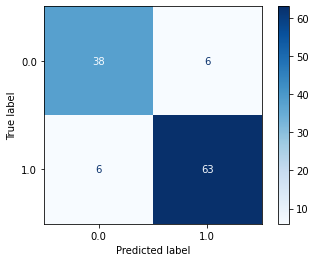

In [21]:
from sklearn.metrics import plot_confusion_matrix, roc_auc_score
from sklearn.metrics import plot_confusion_matrix
log_reg = LogisticRegression(random_state=5, penalty=penalty[0], C = best_lin_c[0], max_iter=1000000, solver=check_penalty(penalty[0]))

log_reg.fit(m_x_train, m_y_train)
y_pred_test = log_reg.predict(m_x_test)
y_pred_proba_test = log_reg.predict_proba(m_x_test)

plot_confusion_matrix(log_reg, m_x_test, m_y_test, cmap=plt.cm.Blues)
plt.grid(False)
                                         
                                          
tn = calc_TP(m_y_test, y_pred_test)
fp = calc_FP(m_y_test, y_pred_test)
fn = calc_FN(m_y_test, y_pred_test)
tp = calc_TP(m_y_test, y_pred_test)

print('Linear:')
Se = tp/(tp + fn)
Sp = tn/(tn+fp)
PPV = tp/(tp + fp)
NPV = tn/(tn+fn)
Acc = (tp+tn)/(tp+tn+fp+fn)
F1 = (2*Se*PPV)/(Se+PPV)

print('Sensitivity is {:.2f} \nSpecificity is {:.2f} \nPPV is {:.2f} \nNPV is {:.2f} \nAccuracy is {:.2f} \nF1 is {:.2f} '.format(Se,Sp,PPV,NPV,Acc,F1))
print('AUROC is {:.2f}'.format(roc_auc_score(m_y_test, y_pred_proba_test[:,1])))

Next, we will calculate the Non-linear evaluation metrics:

Non-linear:
Sensitivity is 0.90 
Specificity is 0.95 
PPV is 0.97 
NPV is 0.86 
Accuracy is 0.92 
F1 is 0.93 
AUROC is 0.992


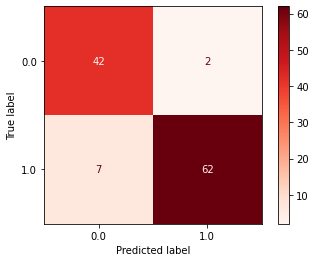

In [22]:
from sklearn.svm import SVC

svc = SVC(random_state=5, C = best_nonlin_c[0], kernel = ker[0], probability=True)
svc.fit(m_x_train, m_y_train)
y_pred_test = svc.predict(m_x_test) 
y_pred_proba_test = svc.predict_proba(m_x_test)

plot_confusion_matrix(svc,m_x_test,m_y_test, cmap=plt.cm.Reds)
plt.grid(False)

TN = calc_TN(m_y_test, y_pred_test)
FP = calc_FP(m_y_test, y_pred_test)
FN = calc_FN(m_y_test, y_pred_test)
TP = calc_TP(m_y_test, y_pred_test)
Se = TP/(TP+FN)
Sp = TN/(TN+FP)
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
Acc = (TP+TN)/(TP+TN+FP+FN)
F1 = (2*Se*PPV)/(Se+PPV)
print('Non-linear:')
print('Sensitivity is {:.2f} \nSpecificity is {:.2f} \nPPV is {:.2f} \nNPV is {:.2f} \nAccuracy is {:.2f} \nF1 is {:.2f} '.format(Se,Sp,PPV,NPV,Acc,F1))
print('AUROC is {:.3f}'.format(roc_auc_score(m_y_test, y_pred_proba_test[:,1])))

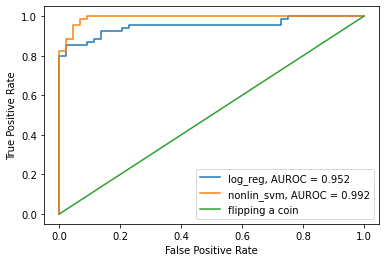

In [23]:
from sklearn.metrics import plot_roc_curve

classifiers = [log_reg, svc]
roc_score = []
plt.figure()
ax = plt.gca()
for clf in classifiers:
    plot_roc_curve(clf, m_x_test, m_y_test, ax=ax)
    roc_score.append(np.round_(roc_auc_score(m_y_test, clf.predict_proba(m_x_test)[:,1]), decimals=3))
ax.plot(np.linspace(0,1,m_x_test.shape[0]),np.linspace(0,1,m_x_test.shape[0]))
plt.legend(('log_reg, AUROC = '+str(roc_score[0]),'nonlin_svm, AUROC = '+str(roc_score[1]),'flipping a coin'))

As we can see in the results, the non linear model preforms better than the linear. The sensitivity is similar and the spesificity in the non-linear model is higher. The AUROC in the non-linear model is closer to 1, the AUROC in the linear model is lower (as we can see in the line plot). 

6) Feature Selection (10%)<br>
a. As seen previously, a Random Forest Network can be used to explore feature
importance. Train a Random Forest on your data.<br>
i. What are the 2 most important features according to the random forest.<br>
ii. Does this match up exactly with the feature exploration you did? <br>

In [24]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000)
clf = rf.fit(X_train, y_train)# Train the model on training data
predictions = clf.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
#print(errors)
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(list(T1D_features_clean.keys()), importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
print(feature_importances)


[('Increased Urination', 0.23), ('Increased Thirst', 0.17), ('Gender', 0.1), ('Age', 0.09), ('Partial Paresis', 0.06), ('Sudden Weight Loss', 0.05), ('Irritability', 0.04), ('Delayed Healing', 0.04), ('Hair Loss', 0.04), ('Increased Hunger', 0.03), ('Visual Blurring', 0.03), ('Itching', 0.03), ('Weakness', 0.02), ('Genital Thrush', 0.02), ('Muscle Stiffness', 0.02), ('Obesity', 0.02), ('Family History', 0.01)]


Increased urination and increased thirst are the most important features, similar to what we have explored before. Also here, obesity is not an important feature, strenthening our earlier results. 

7) Data Separability Visualization: (20%) <br>
a. Perform dimensionality reduction on the dataset so that you can plot your data in a
2d plot (show samples with positive and negative labels in different colors). <br>
b. How separable is your data when reduced to just two features? <br>
c. Train the same models above on the dimensionality-reduced training set. <br>
d. Train the same models on the best two features from section 6. <br>
e. What performs better? 2 features of the reduced dimensionality.  <br>

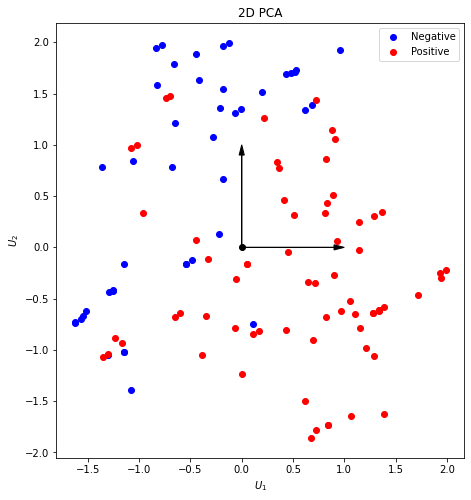

In [25]:
from sklearn.decomposition import PCA
scaler = StandardScaler()
x_train_scal = scaler.fit_transform(m_x_train)
x_test_scal = scaler.transform(m_x_test)

n_components = 2
pca = PCA(n_components=n_components, whiten=True)
X_train_pca = pca.fit_transform(x_train_scal)
X_test_pca = pca.transform(x_test_scal)

def plt_2d_pca(X_pca,y):
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, aspect='equal')
    ax.scatter(X_pca[y==0, 0], X_pca[y==0, 1], color='b')
    ax.scatter(X_pca[y==1, 0], X_pca[y==1, 1], color='r')
    ax.legend(('Negative','Positive'))
    ax.plot([0], [0], "ko")
    ax.arrow(0, 0, 0, 1, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
    ax.arrow(0, 0, 1, 0, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
    ax.set_xlabel('$U_1$')
    ax.set_ylabel('$U_2$')
    ax.set_title('2D PCA')
    
plt_2d_pca(X_test_pca,m_y_test)

We can see that there is a difference between the blue and red dots. However there is some overlap so it is not completely seperable. 

We will continue using the non-linear SVM algorithm, since it preforms better. And deploy it on the test set. 

In [28]:
print(X_train_pca.shape)

(452, 2)


In [ ]:
#svc = SVC(random_state=5, C = best_nonlin_c[0], kernel = ker[0], probability=True)
#svc.fit(X_train_pca, m_y_train)
#y_pred_test = svc.predict(X_test_pca) 
#y_pred_proba_test = svc.predict_proba(X_test_pca)


In [ ]:
#y_pred_test = clf.predict(X_train_pca) 
#y_pred_proba_test = clf.predict_proba(X_train_pca)

#plot_confusion_matrix(best_svm_nonlin,X_test_pca, m_y_test,cmap=plt.cm.Greens)
#plt.grid(False)

#TN = calc_TN(m_y_test, y_pred_test)
#FP = calc_FP(m_y_test, y_pred_test)
#FN = calc_FN(m_y_test, y_pred_test)
#TP = calc_TP(m_y_test, y_pred_test)
#Se = TP/(TP+FN)
#Sp = TN/(TN+FP)
#PPV = TP/(TP+FP)
#NPV = TN/(TN+FN)
#Acc = (TP+TN)/(TP+TN+FP+FN)
#F1 = (2*Se*PPV)/(Se+PPV)
#print('Non-linear:')
#print('Sensitivity is {:.2f} \nSpecificity is {:.2f} \nPPV is {:.2f} \nNPV is {:.2f} \nAccuracy is {:.2f} \nF1 is {:.2f} '.format(Se,Sp,PPV,NPV,Acc,F1))
#print('AUROC is {:.3f}'.format(roc_auc_score(m_y_test, y_pred_proba_test[:,1])))

['Increased Urination', 'Increased Thirst']
Non-linear:
Sensitivity is 0.84 
Specificity is 0.82 
PPV is 0.88 
NPV is 0.77 
Accuracy is 0.83 
F1 is 0.86 
AUROC is 0.877


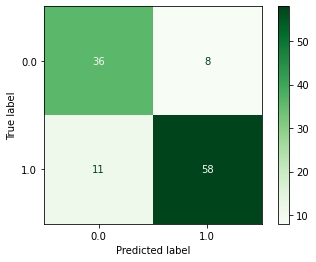

In [49]:
feat_name = feature_importances[0][0], feature_importances[1][0]
feat_name = list(feat_name)
print(feat_name)
svc = SVC(random_state=5, C = best_nonlin_c[0], kernel = ker[0], probability=True)
m_x_train, m_x_test, m_y_train, m_y_test = train_test_split(T1D_features_clean[feat_name], Y, test_size =0.2, random_state = 5, stratify=Y)
svc.fit(m_x_train,m_y_train)
y_pred_test = svc.predict(m_x_test) 
y_pred_proba_test = svc.predict_proba(m_x_test)

plot_confusion_matrix(svc,m_x_test,m_y_test, cmap=plt.cm.Greens)
plt.grid(False)

TN = calc_TN(m_y_test, y_pred_test)
FP = calc_FP(m_y_test, y_pred_test)
FN = calc_FN(m_y_test, y_pred_test)
TP = calc_TP(m_y_test, y_pred_test)
Se = TP/(TP+FN)
Sp = TN/(TN+FP)
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
Acc = (TP+TN)/(TP+TN+FP+FN)
F1 = (2*Se*PPV)/(Se+PPV)
print('Non-linear:')
print('Sensitivity is {:.2f} \nSpecificity is {:.2f} \nPPV is {:.2f} \nNPV is {:.2f} \nAccuracy is {:.2f} \nF1 is {:.2f} '.format(Se,Sp,PPV,NPV,Acc,F1))
print('AUROC is {:.3f}'.format(roc_auc_score(m_y_test, y_pred_proba_test[:,1])))

We can see from the results in this case, using two features gave us worse results. From that we can understand that although the other features have a small contribution it is still critical for a good outcome.  <br>
Although we didn't manage to train the PCA in the data, we assume that PCA will be better than the 2 features. We saw now, that using only two features we lose important information, giving us worse results. When we do dimentionality reduction with PCA, PCA only reduces information that is linearly dependent, information that doesn't add to our model. Therefor we don't expect to lose important information in PCA like we did here in the two features. 

Theory Questions (28%)
1) To evaluate how well our model performs at T1D classification, we need to have evaluation
metrics that measures of its performances/accuracy. Which evaluation metric is more
important to us: model accuracy or model performance? Give a simple example that
illustrates your claim.<br>

The performance is more important. If I have a test set of one person sick with T1D, we will have a very high accuracy although the performance is low. In diabetes it’s important to have less false positives since we will treat the patients, so it is critical we have good specificity. On the other hand, if we are not sensitive enough to distinguish a diebetic, this person can be treated or diagnosed later on. Meaning this model for T1D prediction isn’t critical like a heart attack prediction.  

2) T1D is often associated with other comorbidities such as a heart attack. You are asked to
design a ML algorithm to predict which patients are going to suffer a heart attack. Relevant
patient features for the algorithm may include blood pressure (BP), body-mass index (BMI),
age (A), level of physical activity (P), and income (I). You should choose between two
classifiers: the first uses only BP and BMI features and the other one uses all of the features
available to you. Explain the pros and cons of each choice.<br>

Many features model can take a lot of time and memory to process, especially if there are many examples. On the other hand, many features can give us a better prediction, it takes into account more variables. The best way to plan and design the algorithm would be to choose the features using random forest or dimension reduction such as PCA. 

3) A histologist wants to use machine learning to tell the difference between pancreas biopsies
that show signs of T1D and those that do not. She has already come up with dozens of
measurements to take, such as color, size, uniformity and cell-count, but she isn’t sure which
model to use. The biopsies are really similar, and it is difficult to distinguish them from the
human eye, or by just looking at the features. Which of the following is better: logistic
regression, linear SVM or nonlinear SVM? Explain your answer.<br>

SVM performs well with higher dimensions. SVM tries to find the margin between classes – looks at the differences between the groups. The data we have is not linear (it’s difficult to separate with the human eye) or binary (can have different sizes or cell-count) therefore we would choose to use non-linear SVM.

4) What are the differences between LR and linear SVM and what is the difference in the
effect/concept of their hyper-parameters tuning?

SVM can be used when dealing also with non-linear data vs logistic regression that’s only used for linear data. SVM is useful for high dimensional data while logistic regression performs better on binary features. SVM requires a large amount of time to process, it is a slow algorithm. Logistic regression on the other hand is simple to implement. In SVM selecting hyperparameters is important. It allows us to have a sufficient generalized performance. The kernel in SVM transforms the data to the required form. In Logistic regression we tune regularization parameters like lambda and the penalty. These help prevent overfitting of the model. We also have to penalty curves, L1 creates a more spars weight matrix.
